In [ ]:
"""
Purpose: To be able and validate when a 
branch splits off into 2 branches and 
whether or not this is valid


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-07-01 17:20:05,537 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-01 17:20:05,540 - settings - Setting database.user to celiib
INFO - 2021-07-01 17:20:05,542 - settings - Setting database.password to newceliipass
INFO - 2021-07-01 17:20:05,543 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-01 17:20:05,544 - settings - Setting database.user to celiib
INFO - 2021-07-01 17:20:05,545 - settings - Setting database.password to newceliipass
INFO - 2021-07-01 17:20:05,561 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-07-01 17:20:06,131 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-01 17:20:06,446 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-01 17:20:06,448 - settings - Setting database.user to celiib
INFO - 2021-07-01 17:20:06,450 - settings - Setting database.password to newceliipass
INFO - 2021-07-01 17:20:06,451 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-01 17:20:07,100 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-01 17:20:07,226 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-01 17:20:07,228 - settings - Setting database.user to celiib
INFO - 2021-07-01 17:20:07,229 - settings - Setting database.password to newceliipass
INFO - 2021-07-01 17:20:07,230 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-01 17:20:07,231 - settings - Setting database.user to celiib
INFO - 2021-07-01 17:20:07,232 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-07-01 17:20:08,142 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-07-01 17:20:08,144 - settings - Setting database.user to celiib
INFO - 2021-07-01 17:20:08,145 - settings - Setting database.password to newceliipass
INFO - 2021-07-01 17:20:08,148 - settings - Setting enable_python_native_blobs to True
INFO - 2021-07-01 17:20:08,988 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
import concept_network_utils as cnu
import neuron_statistics as nst

# Pulling Down a Neuron

In [6]:
segment_id = 864691135212632448

In [7]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [8]:
minnie.DecompositionCellType()& dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,allen_e_i,allen_e_i_n_nuc,allen_cell_type,allen_cell_type_n_nuc,allen_cell_type_e_i,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,cell_type_for_axon,axon_volume volume of the oriented bounding box of axon (divided by 10^14),axon_length length (in um) of the classified axon skeleton,axon_branch_length_median length (in um) of the classified axon skeleton,axon_branch_length_mean length (in um) of the classified axon skeleton,axon_n_branches,axon_n_short_branches,axon_n_long_branches,axon_n_medium_branches,axon_bbox_x_min,axon_bbox_y_min,axon_bbox_z_min,axon_bbox_x_max,axon_bbox_y_max,axon_bbox_z_max,axon_bbox_x_min_soma_relative,axon_bbox_y_min_soma_relative,axon_bbox_z_min_soma_relative,axon_bbox_x_max_soma_relative,axon_bbox_y_max_soma_relative,axon_bbox_z_max_soma_relative,run_time the amount of time to run (seconds)
864691135212632448,0,0.25,30.00,7,0,0,6,=BLOB=,301095,1186.5,1,1,excitatory,densely_spined,1,1,169.19782551666762,0.0004730579787217253,0,3361786.307754809,98,4361480.96279547,excitatory,1,5P_IT,1,excitatory,0.0,0.0,excitatory,103.74924817914972,2245.668874429093,6.540861338220179,12.204722143636376,184,88,1,95,650779.2555368412,679588.4768641673,723513.567330264,833718.6664819184,915465.8638145905,963945.071757931,-90725.57701373694,-61087.37313583854,-127024.11600307119,92213.83393134025,174790.0138145847,113407.38842459582,450.7


In [9]:
neuron_obj = neuron_objs[0]

# Proofread the Neuron to get some instances of 1 degree branching

In [10]:
import validation_utils as vu
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = 301095,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=0)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {'L4': array([ 16,  17,  19,  18,  29,  33,  41,  28,  44,  34,  54,   0,  56,
        58,  50,  59,  73,  64,  74,  93,  94, 112, 114, 117, 157, 162,
       163, 175, 177, 178, 179, 172, 176])}
Recieved another instance of Neuron class in init -- so just copying data



 ---- Total time for applying filter: 77.3171238899231 -----

--- Finished Part 1: Filtering Neuron -----

---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 3779 
# of presyn: 416
# of postsyn: 3363

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 82
# of valid_syn_idx = 334
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 

limb_name = L4
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L4 because was the limb in the first key


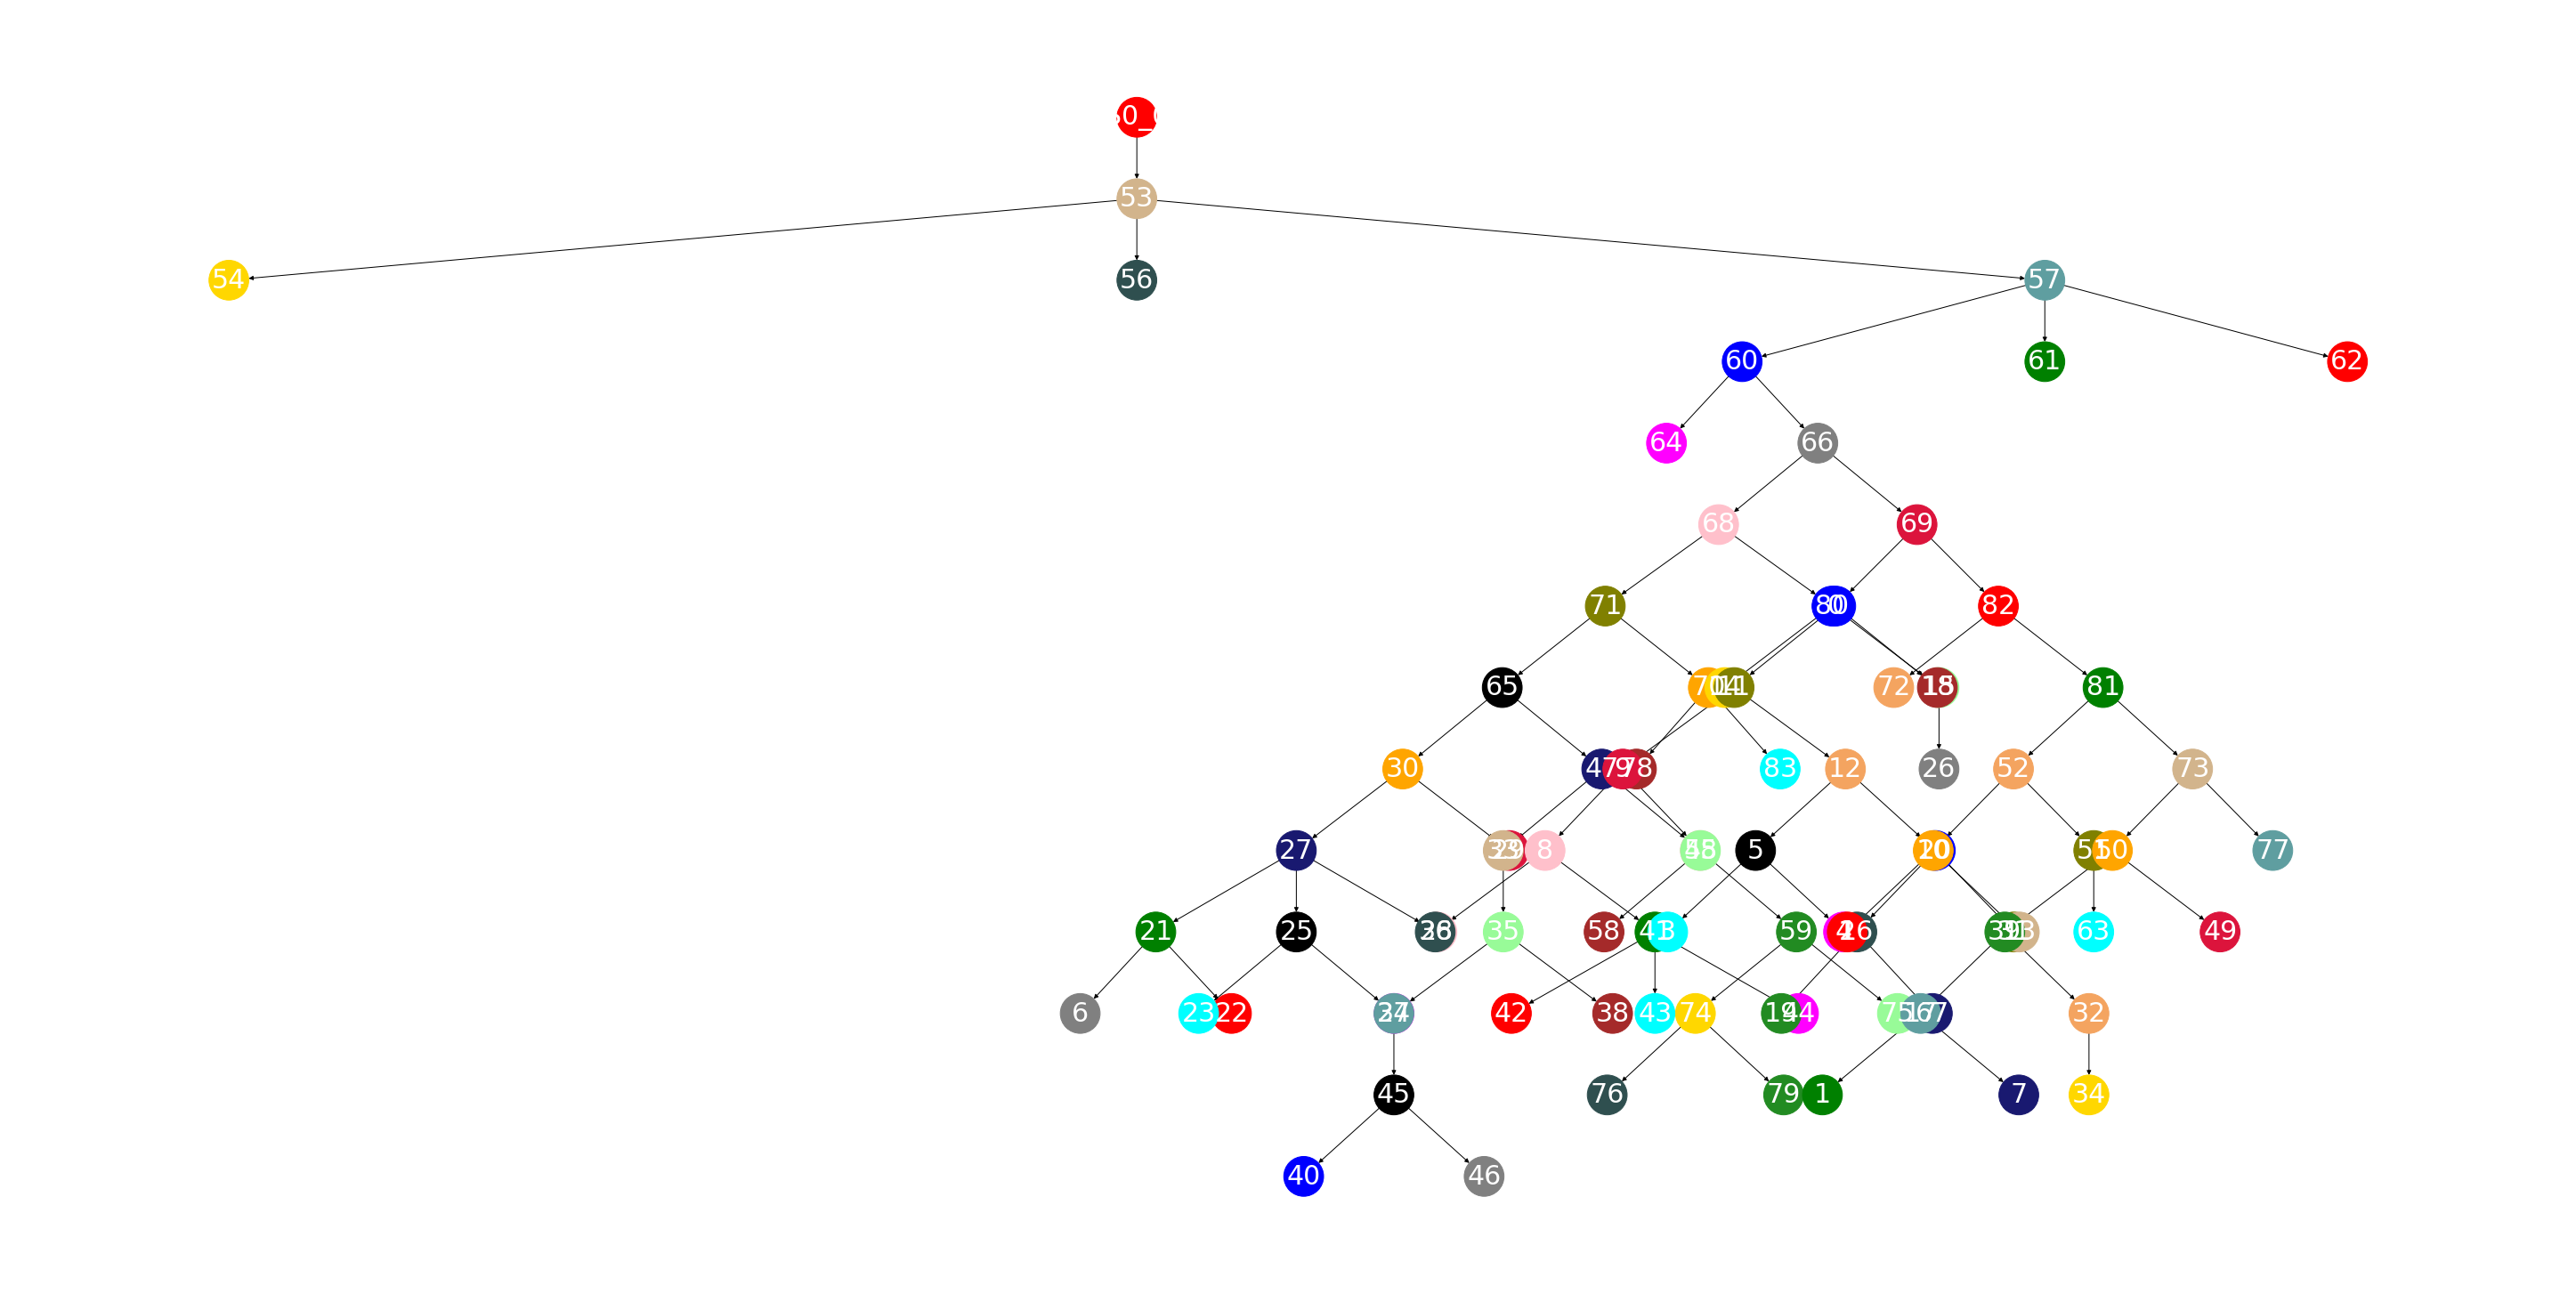

In [11]:
nviz.visualize_neuron_specific_limb(filt_neuron,
               filt_neuron.axon_limb_idx)

# Low Branch Function

In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   filt_neuron.axon_limb_name)

In [12]:
import neuron_searching as ns
ns.query_neuron(filt_neuron,
               functions_list=[ns.n_synapses,ns.n_downstream_nodes],
            query="(n_synapses > 0) and (n_downstream_nodes == 1)")

{'L3': array([14]), 'L4': array([33, 51]), 'L6': array([14])}

In [14]:
import axon_utils as au
axon_spines_limb_branch_dict = au.axon_spines_limb_branch_dict(filt_neuron)
short_thick_endnodes_to_remove_limb_branch = au.short_thick_branches_limb_branch_dict(filt_neuron)
ax_name = filt_neuron.axon_limb_name       
axon_spines = axon_spines_limb_branch_dict[ax_name]
short_thick_endnodes = short_thick_endnodes_to_remove_limb_branch[ax_name]
filt_neuron[ax_name].axon_spines = axon_spines
filt_neuron[ax_name].short_thick_endnodes = short_thick_endnodes  



In [15]:
print(f"nodes_to_exclude = {filt_neuron[ax_name].nodes_to_exclude}")

nodes_to_exclude = [ 4  7 19 34 38 42 43  4  7 22 28 34 38 43 54 56 61 62 64]


In [ ]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   ax_name)

downstream_branches = [30 47]
skipped_nodes = []
Total number of short_thick_endnodes_to_remove = 12
downstream_branches after remove_short_thick_endnodes = [30 47]
Total number of axon_spines = 7
downstream_branches after remove_short_thick_endnodes = [30 47]
widths_in_branches = [55.47317933 86.3391564  73.93666148]
***Branch being considered after filters = 65***
Last group is skipped
Group blue: [30]
Group green: [47]
Group red: [65]
Group cyan: []


branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Performing Edge Query
After edge filter, # of rows = 2

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  30  47    100.90   30.865977               0.556413                   0.0   
1  30  65     34.89   18.463482               0.249720                   0.0   
2  47  65     48.65   12.402495               0.167745                   0.0   

   n_synapses_diff  
0                0  
1                0  
2                0  
Afer Local query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  30  65     34.89   18.463482               0.249720                   0.0   
1  47  65     48.65   12.402495               0.167745                   0.0   

   n_synapses_diff  
0                0  
1                0  


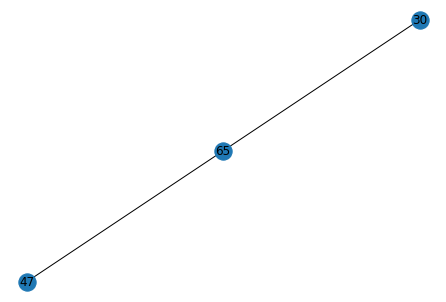

In [20]:
import error_detection as ed
upstream_branch = 65

limb_obj = filt_neuron[ax_name]
G = ed.low_degree_upstream_match(
    limb_obj=limb_obj,
    branch_idx=upstream_branch,
    filters_to_run = None, # provides a list of all the checks you want to run
    
    #--- Phase A: arguments for determining downstream nodes ------
    skip_distance = 0,#3000,
    min_upstream_skeletal_distance = 2000,
    remove_short_thick_endnodes = True,
    short_thick_endnodes_to_remove = filt_neuron[ax_name].short_thick_endnodes,
    axon_spines = filt_neuron[ax_name].axon_spines,
    
    # helps determine the max degrees to resolve
    width_func = au.axon_width,
    max_degree_to_resolve = 3,
    #max_width_to_resolve = None,
    
    # parameter checking to see if high degree resolve can be used
    width_max = 170,
    axon_dependent = True,
    
    plot_starting_branches = True,
    plot_extracted_skeletons = False,
    
    plot_G_local_edge = True,
    verbose = True,
    )

# Computing the features of the graph

In [21]:
downstream_branches =[30,47]
upstream_branch = 65

In [23]:
import networkx_utils as xu
node_functions = [
    dict(name="skeletal_length_downstream",
     function = nst.skeletal_length_downstream,
     nodes_to_compute = downstream_branches),

    dict(name="skeletal_length_downstream_total",
     function = nst.skeletal_length_downstream_total,
     nodes_to_compute = downstream_branches,),
    
    dict(name="width_downstream",
     function = nst.width_downstream,
     nodes_to_compute = downstream_branches,),
    
    dict(name="width_upstream",
     function = nst.width_upstream,
     nodes_to_compute = upstream_branch,)

]

nst.compute_node_attributes(G,
                       limb_obj,
                        node_functions=node_functions,
                       verbose = True)
xu.node_df(G)

Working on skeletal_length_downstream with args = {}
Working on skeletal_length_downstream_total with args = {}
Working on width_downstream with args = {}
Working on width_upstream with args = {}


,u,skeletal_length_downstream,skeletal_length_downstream_total,width_downstream,width_upstream
0,30,35801.779851,70728.604442,55.473179,NaN
1,47,47514.510922,193216.328871,86.339156,NaN
2,65,NaN,NaN,NaN,73.936661


In [ ]:
nviz.visualize_branch_at_downstream_split(filt_neuron,
                                         limb_idx=4,
                                         branch_idx=65)

# --- Creating Each of the Graph Filters

# A) Axon Webbing Feature

In [24]:
"""
Purpose: To determine
potential errors due to axon webbing

pre_filter_checks:
child_width_maximum = 75
parent_width_maximum = 75
child_skeletal_threshold = 10000
child_angle_min = 120


# 
web_size_threshold=120,
web_size_type="ray_trace_median",
web_above_threshold = True,


"""

#arguments for pre filter chekcs
parent_width_maximum = 75
child_angle_min = 120
child_skeletal_threshold = 10000
child_angle_min = 120

#arguments for webbing threshold
web_size_threshold=120
web_size_type="ray_trace_median"
web_above_threshold = True

# Finding the different features about the intersection

In [25]:
upstream_branch
downstream_branches = np.array([30,47])

# a) Axon Webbing

In [26]:
web_size_threshold=120
web_size_type="ray_trace_median"
web_above_threshold = True
verbose = True


mesh_connection = cnu.downstream_nodes_mesh_connected(limb_obj,
                                   upstream_branch,
                                    downstream_branches=downstream_branches,
                                   n_points_of_contact = 2)

if verbose:
    print(f"mesh_connection = {mesh_connection}")

curr_web = limb_obj[upstream_branch].web

if curr_web is not None:
    valid_web_result = au.valid_web_for_t(curr_web,
                       size_threshold = web_size_threshold,
                       size_type = web_size_type,
                       above_threshold = web_above_threshold,
                           verbose=verbose)
    
print(f"valid_web_result = {valid_web_result}")

mesh_connection = True
Web size = 311.7165247612256
valid_web_result = True


In [27]:
nviz.visualize_branch_at_downstream_split(filt_neuron,
                                         4,upstream_branch)

# of downstream targets = 2
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


downstream_branches = [30 47]
downstream_branches[0] = 30
web_size_faces:124
web_size_volume:165041656.23445892
web_size_skeleton:1445.2651512747777
web_size_ray_trace_percentile:417.53246858994436
web_bbox_ratios_max:1.638522207278731
web_bbox_ratios_min:1.191097076865857
web_volume_ratio:2.735692060386211
web_cdf:0.676064
parent_n_large_boutons:0
parent_n_boutons:0
parent_no_bouton_median:73.9366614831633
parent_no_spine_median_mesh_center:73.9366614831633
child_no_bouton_median_min:86.33915639682837
child_no_bouton_median_diff_min:12.402494913665066
child_no_spine_median_mesh_center_min:99.38599806891035
child_no_spine_median_mesh_center_diff_min:25.449336585747048
child_angle_min:39.71
child_n_boutons_min:3
child_n_large_boutons_min:0
child_no_bouton_median_max:86.33915639682837
child_no_bouton_median_diff_max:12.402494913665066
child_no_spine_median_mesh_center_max:99.38599806891035
child_no_spine_median_mesh_center_diff_max:25.449336585747048
child_angle_max:44.97
child_n_boutons

# B) Axon Spines at Intersection

In [28]:
axon_spines_on_intersection = np.intersect1d(limb_obj.axon_spines,
                                             nru.downstream_nodes(limb_obj,upstream_branch))
axon_spines_on_intersection

array([], dtype=int64)

# C) Distance of Closest Synapse

In [29]:
upstream_branch = 33

nst.min_synapse_dist_to_branch_point(limb_obj,
                                    branch_idx = upstream_branch,
                                    plot_closest_synapse=True,
                                    verbose = True)

down_syn = [], down_nodes = [35]
upstream_dist from downstreams = []
downstream_dist from current node = [1005.3377943077703, 31899.624252029906, 32686.082151441406]
All distances: [ 1005.33779431 31899.62425203 32686.08215144]
min_distance_from_branch_point: 1005.3377943077703


1005.3377943077703

# D) Fork Divergence

In [30]:
# restrictions on the widths of the downstream and upstream
upstream_branch = 30

downstream_width_max = 90
upstream_width_max = 90

divergence_threshold_mean = 160

# has restrictions on the amount of downstream skeleton and the 
# skeleton of the current nodes
total_downstream_skeleton_length_threshold = 0#4000
individual_branch_length_threshold = 0#3000

div = nst.fork_divergence(limb_obj,upstream_branch,
                          total_downstream_skeleton_length_threshold=total_downstream_skeleton_length_threshold,
                          individual_branch_length_threshold = individual_branch_length_threshold,
               plot_restrictions = False,
               verbose = True)
if verbose:
    print(f"Fork divergence = {div}")

downstream_nodes = [27 29]
skeletal length = [2830.87635669 3417.74775348]
downstream skeletal length = [36384.6228868   3417.74775348]
joining_endpoint_1 = [728596.5 825728.9 829876.2]
Segment sizes after restriction
[ 40.          79.99977495 119.99977495 159.99973538 199.9992882
 239.9992857  279.99786717 319.99786717 359.99786717 390.71483232]
[ 39.99999952  79.99601152 119.99540846 159.99025405 199.97478905
 239.97478905 279.97478905 319.97478905 359.97478905 376.71638927]
[ 30.87635669  70.87635669 110.87635669 150.86054043 190.86054043
 230.72828028 270.72828028 310.72828028 350.71696515 390.71696515]
[ 17.74775348  57.74775348  97.74775348 137.74775348 177.74775348
 217.2270262  257.2270262  296.78411687 336.78411687 376.74160022]
min_length = 11
return_value = 316.396038409343
Fork divergence = 316.396038409343


# e) Doubling Back

In [31]:
import networkx_utils as xu
verbose = True

double_back_threshold = ed.double_back_threshold_axon_by_width(limb_obj,upstream_branch)

sk_angle_edges = np.array([G[upstream_branch][d]["sk_angle"] for d in downstream_branches])
    
double_back_branches = downstream_branches[sk_angle_edges > double_back_threshold]

if verbose:
    print(f"double_back_threshold = {double_back_threshold}")
    print(f"sk_angle_edges = {sk_angle_edges}")
    print(f"Double back branches: {double_back_branches}")

KeyError: 30